# **MÓDULO 33 - Projeto Final de Modelos Avançados**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes de um shopping utilizando o algoritmo de clustering K-Means. Ao final do projeto, você terá a oportunidade de consolidar seus conhecimentos em exploração de dados, pré-processamento, implementação e avaliação de modelos.

**Exploração de Dados:**

Inicie explorando o dataset fornecido, buscando entender as principais características das variáveis e a distribuição dos dados.

Realize análises descritivas, identifique padrões, e verifique a presença de valores ausentes ou inconsistências que precisem ser tratadas.

**Tratamento de Dados:**

Realize os tratamentos necessários como limpeza de dados, normalização ou padronização das variáveis, e, se necessário, a criação de variáveis derivadas.

Documente cada etapa do tratamento, explicando o motivo das escolhas feitas e como elas impactam no modelo.

**Implementação do Algoritmo K-Means:**

Aplique o algoritmo K-Means no dataset tratado. Defina o número de clusters (k).
Execute o algoritmo, ajuste os parâmetros conforme necessário, e documente o processo.

**Avaliação e Interpretação dos Resultados:**

Avalie a qualidade dos clusters gerados utilizando métricas adequadas.

Interprete os resultados, descrevendo as características de cada cluster e como eles podem ser utilizados para a segmentação de clientes.

Sugira aplicações práticas para os clusters identificados, como estratégias de marketing direcionadas ou personalização de ofertas.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

Notem que neste projeto vocês terão autonomia para criar os passos e justificar, sempre, os passos escolhidos.

# Importações

In [1]:
# Importações de bibliotecas para manipulação e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importações de bibliotecas para pré-processamento de dados

from sklearn.preprocessing import StandardScaler

# Importações de modelos de machine learning e métricas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Exploração de Dados

### Carregando a base de dados

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Verificação e ajuste das variáveis

In [3]:
df = df.drop(['CustomerID', 'Gender'], axis=1) # Remoção de variável desnecessária para análise e de variável categórica que não poderá ser usada

colunas_rename = { # Renomeando as colunas para facilitar a escrita e leitura do código
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}

df = df.rename(mapper=colunas_rename, axis=1)

df.info() # Verificando os tipos de variáveis e a presença de dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             200 non-null    int64
 1   Annual_Income   200 non-null    int64
 2   Spending_Score  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


##### Explicação da Etapa:
Após o carregamento e visualização da base com que o projeto será desenvolvido, podemos perceber duas variáveis que não serão necessárias para o projeto e, por isso, foram retiradas. A primeira é a 'CustomerID', ou seja, o ID dos compradores, que é uma característica de identificação dos casos que temos e não oferece potencial estatístico para o modelo analisar criticamente e utilizar como fator de agrupamento. A segunda é 'Gender', ou seja, o Gênero dos clientes. Essa coluna até tem sua importância para diversos projetos de ciências de dados, como classificação, contudo, o modelo feito aqui é de aprendizado não supervisionado de agrupamento (ou clusters) por K-Means, em que dados categóricos não podem ser analisados no Machine Learning, o que significa que essa variável precisaria ser transformada por encoders para se tornar numérica. Ainda assim, ela se tornaria um variável binária e categórica, que dificilmente contribuiria para o objetivo e, de fato, após a realização de testes com essas informações codificadas, poucas alterações foram notadas, com alguns agrupamentos até sendo prejudicados por conta disso. Dessa forma, ambas as colunas foram descartadas.

Além disso, para facilitar o desenvolvimento do código, foi importante renomear as variáveis de 'Annual Income (k$)' e 'Spending Score (1-100), que continham espaços e caracteres especiais, além de nomes muito extensos, para nomes mais simples e padronizados.

Por fim, utilizando 'df.info()', foi possível verificar a existência de dados faltantes e os 'dtypes' das variáveis. Assim, percebe-se que não existem valores nulos na base inteira e todas as variáveis são numéricas, o que significa que nenhuma alteração mais é ne

In [4]:
df.describe() # Observação de informações estatísticas das variáveis numéricas 

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
# Criando Box Plot para as variáveis numéricas

colunas = { # Dicionário que contém as variáveis numéricas e seus valores
    'Idade': df['Age'],
    'Renda Anual': df['Annual_Income'],
    'Score de Gasto': df['Spending_Score']
}

df_colunas = pd.DataFrame(colunas) # Coloca o dicionário em um DataFrame para serem análisados juntos em uma única figure

df_colunas = pd.melt(df_colunas, var_name='Colunas', value_name='Valores') 
# pd.melt - Nosso DataFrame precisa ser remodelado do formato largo, em que cada variável representa uma coluna com seus valores, para o formato longo, em que as variáveis são valores de 'Colunas' 
# e os seus valores estão na mesma linha mas são valores de 'Valores'

fig = px.box( # Cria os boxplots de cada coluna do df original em apenas uma figure para serem analisadas lado a lado, ocupando menos espaço no projeto e facilitando a visualização
    df_colunas,
    x='Colunas',
    y='Valores',
    color='Colunas'
)

fig.update_layout( # Configura o layout do gráfico
    title = {'text': 'BoxPlot das Variáveis', 'font': {'size': 22}},
    yaxis_title = {'font': {'size': 18}},
    xaxis_title = {'text':'Variáveis', 'font': {'size': 18}},
    legend_title = {'text': 'Variáveis', 'font': {'size': 18}},
    width = 1000,
    height = 500
)

fig.show()

In [6]:
outlier = df[df['Annual_Income'] > 126] # Pega os valores acima do limite superior de renda anual
outlier

,Age,Annual_Income,Spending_Score
198,32,137,18
199,30,137,83


##### Explicação da Etapa:
Com a checagem inicial feita, é importantíssimo checar se existem dados anômalos ou extremos em cada uma das variáveis, como, por exemplo, um score de gasto fora do limite estabelecido de 1 a 10 ou uma idade de 150. Para isso, foi chamada a 'df.describe()', que calcula e junta os princiapais dados estatísticos, como média e mediana, das variáveis numéricas. Analisando esse conjunto, foi possível perceber que não havia nenhum valor incorreto com o que cada coluna representava e a variação dos valores estava de acordo com o esperado, mas, por garantia, foram construídos BoxPlots de cada uma das variáveis para uma investigação mais detalhada sobre seus valores. Dessa forma, foi possível perceber que 'Idade' e Score de Gasto' apresentaram gráficos normais, sem nenhum 'outlier', enquanto 'Renda Anual' apresentou um valor extremo maior. Com isso, foi necessário entender melhor esse outlier e vemos que existem 2 casos da base com esses valores e que ele não estavam tão afastado do limite superior do BoxPlot. Entendo que esse valor fora do padrão representavam pessoas com maior ganho de dinheiro anualmente do que o normal, o que é algo mais raro mas que ocorre, esta variação é esperada, o que permitu a conclusão de que não havia necessidade de trasnformar esse outlier e muito menos retirá-lo, já que a base em si é pequena e qualquer perda de dados seria prejudicial para resultados eficientes.

Com isso, o primeiro passo de exploração de dados se conclui.

# Tratamento dos Dados

### Padronização dos Dados

In [7]:
scaler = StandardScaler() # Cria um objeto StandardScaler para padronizar os dados

df_padronizado = df.copy() # Cria uma cópia do df para evitar modificar o original

colunas_padronizadas = ['Age', 'Annual_Income', 'Spending_Score'] # Seleciona as colunas a serem padronizadas

df_padronizado[colunas_padronizadas] = scaler.fit_transform(df_padronizado[colunas_padronizadas]) # Aplica a padronização nas colunas selecionadas

df_padronizado

,Age,Annual_Income,Spending_Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


##### Explicação da Etapa:
Agora da etapa de tratamento dos dados, onde transformamos as informações para estarem adequadas ao modelo, o primeiro passo é a padronização. Em projetos de agrupamento utilizando K-Means, é crucial entender as escalas das variáveis e a comparação entre elas, já que o algoritimo desse modelo agrupa os dados de acordo com a distância euclidiana entre eles. Isso significa que, sem a padronização, o cálculo da distância é feito usando os valores de cada uma das variáveis cuja importância é determinada pela prórpia escala, ou seja, se a variação de uma variável for entre 1 a 100 e outra for entre 100.000 a 900.000, o modelo tenderá a dar mais importância ao valor maior, resultando em grupos inadequados e resultados distorcidos. A função da padronização é justamente colocar os valores das variáveis em uma mesma escala e a utilizada nesse projeto estabelece que os dados tem média 0 e desvio padrão de 1, a com maior frequência de uso em projetos desse tipo, por mostrar a melhor eficiência. Dessa forma, o modelo interpretará cada atributo igualmente, o que resultará em um agrupamento coerente e que fornece informações coerentes.

Apesar disso tudo, percebesse que as variáveis presentes nesse projeto possuem escalar bem semelhantes e, após testes, os grupos feitos sem padronização foram bem satisfatórios, mas menos eficientes em comparação a dados padronizados.

### Gráficos de Dispersão da Combinação de Variáveis

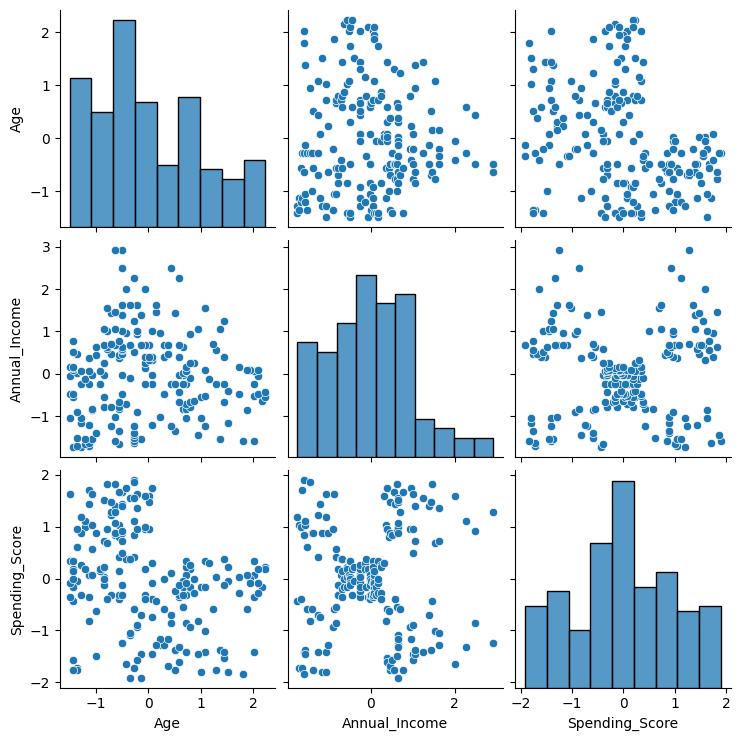

In [8]:
print(sns.pairplot(df_padronizado)) # Visualiza a matriz de dispersão das variáveis padronizadas

##### Explicação da Etapa:
Nesse último momento antes de a implementação do modelo ser feita, é necessário entender a relção dos dados entre si, agora que estão padronizados, para verificar se os tratamentos anteriormente feitos foram corretamente aplicados e se existem mais possíveis mudanças a serem feitas, além de obter possíveis insights que podem beneficiar a configuração dos parâmetros do modelo. Para isso, gráficos de dispersão de cada combinação de variável foram construídos para que uma investigaçam mais detalhada posssa ser feita. É possível perceber que as escalas são as mesmas, o que confirma o sucesso da padronização e, ainda mais, certas obeservações podem ser feitas:

* **Annual_Income X Spending_Score**: 

A dispersão dos dados entre essas variáveis mostra um padrão em que 5 grupos podem ser formados, 2 com uma da variáveis com valor mais baixo, 1 com as duas variáveis baixas, 1 com com as duas variáveis altas e 1 com ambas as variáveis tendo valores mais medianos. Com isso, requisitar que o K-Means divida em 5 cluster poss nos resultar um melhor resultado.

* **Annual_Income X Age**:

A distribuição das informações é pequena, com os dados mais próximos uns dos outros, em que a renda é mais baixa ou mediana e a idade varia desde o mais novo até o mais velho, com uma minoria de dados com idades diferentes se distanciando desse grupo em direção a uma renda nem tão alta e nem tão pequena. Esse gráfico é de mais dificíl comprensão em relação ao possíveis grupos, então será necesário diferentes teste para evidenciar os clusters.

* **Spending_Score X Age**:

Similar com o gráfico anteriormente visto, a evidência de grupos não é muito óbvia, mas ainda assim é perceptível. O gráfico nos mostra praticamente a inexistência de pessoas mais velhas com um elevado score de gasto. Ao invés disso, existe um claro grupo de pessoas mais novas com um elevado score de gasto, um outro grupo de pessoas mais velhas com score mediano e um grupo sem restrição de idade que tem péssimos score de crédito. Assim, pode-se dizer que esse gráfico evidencia que o modelo deve obter bons resultados com 2 ou 3 clusters no máximo.

Com esses insights retirados, há uma boa quantidade de medidas que podem ser feitas durante a implementação do modelo e não é necessário realizar nenhum tratamento a mais, o que significa que a etapa de tratamento dos dados foi concluída.

# Implementação do Modelo

### Método do Cotovelo

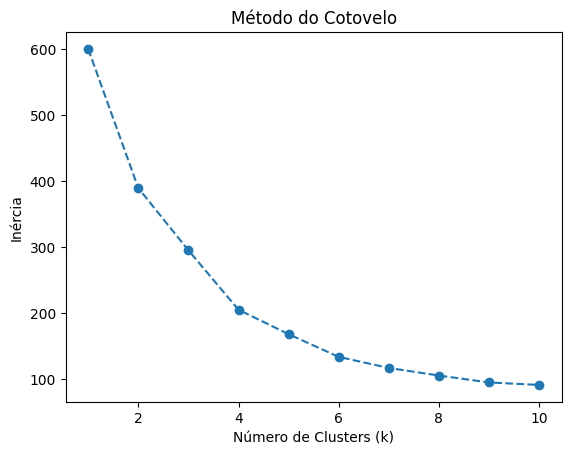

In [9]:
inercia = [] # Lista para armazenar a inércia
for i in range(1, 11): # Loop para testar de 1 a 10 clusters e adicionar a lista criada
    kmeans = KMeans(n_clusters=i) # Cria um modelo KMeans para i clusters
    kmeans.fit(df_padronizado) # Ajusta o modelo aos dados padronizados
    inercia.append(kmeans.inertia_) # Adiciona a inércia à lista

plt.plot(range(1, 11), inercia, marker='o', linestyle='--') # Plota a inércia em função do número de clusters para identificar o ponto de cotovelo
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

##### Explicação da Etapa:
Antes de fato do modelo ser implementado, foi possível perceber através dos gráficos de dispersão que alguns grupos já estavam bem evidentes e poderiam ser formados. Através desses insights, foi possível concluir que de 2 a 5 clusters seriam uma quantidade boa para ser passada como parâmetro ao modelo. Com isso em mente, para definir ainda melhor qual opção seria a mais eficiente, fez-se uso do método do 'cotovelo'. Essa ferramenta se baseia na medida conhecida como 'Inércia', que através da noção de que o K-Means busca agrupar os dados de acordo com a maior proximidade entre si, consiste em minimizar a soma das distâncias entre os pontos dos dados e a localização do centroide correto. Dessa forma, quanto mais cluster existirem, menor será a inércia, já que os dados se aproximam mais. Dessa forma, o gráfico acima mostra a diferença do valor da Inércia de acordo com o número de clusters e é através dessa reta que se define quantos clusters serão passado para o modelo. 

O que se deve procura nesse gráfico é o ponto em que a diferença entre as inércias é menor e menos significativa, ou seja, o momento em que a reta se torna mais curvada, se assemelhando a um cotovelo. Nota-se uma queda considerável entre o ponto 1 e o 2 e entre o 2 e o 3, mas do 3 para 4, vemos o começo da inclinação uma menor diferença do valor da inércia desse ponto em diante. Isso significa que com um 1 ou 2 grupos, a diferença de distância dos dados ao centroide é significativa, então não se tem informações muito precisas, e com 4 ou 5 grupos, existem mais grupos diferentes, porém é desnecessária pois podem haver grupos muito semelhantes e muitos clusters dificultam a interpretação dos resultados. Por isso, o número total de clusters que resultaria na melhor captura da essência e estrutura dos dados, sendo mais detalhada, mas com melhor compreendimento e sem grupos irrelevantes é 3, o ponto onde o cotovelo é formado.

É importante lembrar, porém, que apesar de ser uma boa medida para ser utilizada nos parâmetros, é possível que outros valores podem resultar também em resultados satisfatórios, então testar diferentes possibilidades ainda é importante, ainda com essa informação obtida. 

### Utilizando o K-Means

In [10]:
kmeans_df = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=7) # Cria um modelo KMeans para 3 clusters
kmeans_df.fit(df_padronizado) # Ajusta o modelo aos dados padronizados

labels = kmeans_df.labels_ # Obtém os rótulos dos clusters
df['Cluster'] = labels # Adiciona os rótulos ao DataFrame original

print('\nLabels:', labels)


Labels: [1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2
 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 2 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 2 1 1 1 2 2 2 2 1 2 0 0 1 0 2 0 2 0 2 0 1 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0]


In [11]:
centroides = kmeans_df.cluster_centers_ # Obtém os centróides dos clusters

df_centroides = { # Cria um dicionário para armazenar os centróides e suas respectivas variáveis
    'Idade': centroides[:, 0],
    'Renda_Anual': centroides[:, 1],
    'Score_Gasto': centroides[:, 2],
    }

df_centroides = pd.DataFrame(df_centroides) # Cria um DataFrame a partir do dicionário para melhor visualização dos centróides e suas respectivas variáveis
df_centroides = df_centroides.rename_axis('Centroides')

display(df_centroides)

,Idade,Renda_Anual,Score_Gasto
Centroides,,,
0,-0.430338,1.022233,1.155936
1,-0.933811,-0.679798,0.133820
2,0.891681,0.047414,-0.620804


#### Explicação da Etapa:
Por fim, o último processo dessa etapa é a implementação do modelo. Para isso, utilizamos a instância K-Means que leva 'n_clusters = 3', ou seja, os dados serão agrupados em 3 grupos, 'init = k-means++', que indica a posição do centroides iniciais será a mais espelhada possível, a melhor forma para encontrar os melhores grupos e evitar junções ruins, 'n_init=15', que informa que o modelo deve exercutar o código 15 vezes com diferentes centóides inicis e fornecer aquele com melhor resultado e 'random_state=7', que garante que o alogritimo e seus resultados possam ser repetidos. Com isso, um resultado excelente é mais garantido.

Em seguida, o modelo recebe os dados padronizados e realiza todo processo já explicado. Nesse momento, é importante verificar se os resultados estão de acordo com o esperado, então pegamos os labels_, que são uma lista em que cada item representa o grupo que cada caso representa, e os cluster_centers_, que são os centroides de cada grupo de acordo com a variável, gerados pelo algoritimos e os visualizamos.

Caso tudo esteja nos conformes, o modelo foi implementado com sucesso e é possível partir para a última etapa do projeto, a avaliação dos resultados

Observação: o df['Cluster] = labels adiciona os grupos de cada caso ao Data Frame original para ajudar na etapa de avaliação.

# Avaliação e Interpretação do Modelo


##### Como Avaliar:
Para a avalição, é necessário visualizar os clusters, os dados e como se distribuem. Para isso, gráficos de dispersão mais detalhados de cada combinação de variável são importantíssimos, então observações detalhadas de cada um foram feitas:


### Primeiro Gráfico: Renda Anual X Score

In [12]:
clusters_df = pd.DataFrame({ # Criar DataFrame para visualização dos clusters
    'Renda Anual': df_padronizado['Annual_Income'], # Pega uma coluna padronizada, no caso, a renda anual
    'Score de Gasto': df_padronizado['Spending_Score'], # Pega outra coluna padronizada, no caso, o score de gasto
    'cluster': labels.astype(str) # Converte os labels para string para estarem presentes na legenda do gráfico
})

fig = px.scatter(clusters_df, x='Renda Anual', y='Score de Gasto', color='cluster') # Cria o gráfico de dispersão com as variáveis escolhidas


fig.add_scatter(x=df_centroides['Renda_Anual'], y=df_centroides['Score_Gasto'], # Adiciona os centroides ao gráfico
                mode='markers', marker=dict(color='purple', symbol='x', size= 14), # Define o estilo dos marcadores dos centroides para melhor visualização
                name='Centroides')

fig.update_layout(xaxis_title={'text':' Renda Anual (k$)', 'font': {'size': 18}}, # Configuração do layout
                  yaxis_title={'text':'Score de Gasto (1-100)', 'font': {'size': 18 }},
                  legend_title={'text':'Clusters', 'font': {'size': 18}},
                  title={'text': 'Clusters de Renda Anual e Score de Gasto', 'font': {'size': 22}},
                  width=1625, height=600)


In [13]:
medias_renda_score = df.groupby('Cluster')[['Annual_Income', 'Spending_Score']].mean() # Calcula a média de renda anual e score de gasto para cada cluster
medias_renda_score

,Annual_Income,Spending_Score
Cluster,,
0,87.341463,79.975610
1,42.750000,53.647059
2,61.802198,34.208791


##### Avaliação do Primeiro Gráfico:
O primeiro gráfico nos evidencia a dispersão dos 3 grupos obtidos em relação a renda anual e score de gasto:

* Cluster 0: O primeiro cluster é composto por clientes com uma renda anual em maior parte mediana e algumas altas e alto score de gasto, em que a renda média é 87.000 e o score médio é 77.9

* Cluster 1: O segundo cluster contém clientes majoritariamente de baixa renda anual com alguns na média e um score de gasto em sua maioria alto mas com alguns mais baixos, com renda média de 42.750 e score médio de 53.6

* Cluster 2: O terceiro cluster é formado por clientes com score baixo ou ao menos abaixo da média, com uma relativa variação de renda baixa até alta, mas concentrada principalmente na média e em volta dela, em que a média de renda é 61.800 e a de score é 32.2

Com isso, podemos perceber que o primeiro grupo é melhor estruturado, representando principalmente os casos com score e renda maior, enquanto os outros grupos apresentam casos fora do esperado e são mais dispersos no gráfico, porém a análise de suas médias nos revela que o grupo 2 é feito de pessoas com menor renda e score médio, enquanto o terceiro grupo tem renda na média e baixo score. Dessa forma:

* Grupo 1: Valor monetário Maior, Score Maior

* Grupo 2: Valor monetário Menor, Score Médio

* Grupo 3: Valor monetário Médio, Score Menor

### Segundo Gráfico: Score X Idade

In [14]:
clusters_df = pd.DataFrame({ 
    'Score de Gasto': df_padronizado['Spending_Score'], 
    'Idade': df_padronizado['Age'],
    'cluster': labels.astype(str) 
})

fig = px.scatter(clusters_df, x='Score de Gasto', y= 'Idade', color='cluster') 


fig.add_scatter(x=df_centroides['Score_Gasto'], y=df_centroides['Idade'],  
                mode='markers', marker=dict(color='purple', symbol='x', size= 14),
                name='Centroides')

fig.update_layout(xaxis_title={'text':'Score de Gasto (1-100)', 'font': {'size': 18 }},
                  yaxis_title={'text':'Idade', 'font': {'size': 18 }}, 
                  legend_title={'text':'Clusters', 'font': {'size': 18}},
                  title={'text': 'Clusters de Score de Gasto e Idade', 'font': {'size': 22}},
                  width=1625, height=600)

In [15]:
media_score_idade = df.groupby('Cluster')[['Spending_Score', 'Age']].mean() # Calcula a média de score de gasto e idade para cada cluster
media_score_idade

,Spending_Score,Age
Cluster,,
0,79.975610,32.853659
1,53.647059,25.838235
2,34.208791,51.274725


##### Avaliação do Segundo Gráfico:
O segundo gráfico nos evidencia a dispersão dos 3 grupos obtidos em a relação score de gasto e idade:

* Cluster 0: O primeiro cluster é composto por clientes com alto score de gasto e menoir idade, sendo a média de score 79.9 e a de idade 32.8

* Cluster 1: O segundo cluster contém clientes majoritariamente com score médio com alguns mais alto e de menor idade, com a média de score de 53.6 e de idade 25.8

* Cluster 2: O terceiro cluster é formado por clientes com score de crédito baixo ou na média e com maior idadade, com um média de 34.2 no score e 51.2 na idade 

A estruturação dos grupos é mais consisa, vemo que o grupo 1 tem pessoas adultas, com idades nem tão alta ou baixa mas com score alto; o grupo dois agrega jovens adultos com score médio e o terceiro grupo é composto por adultos mais velhos e idosos que tem um baixos score. Dessa forma:

* Grupo 1: Score Maior, Idade Média
* Grupo 2: Score Médio, Idade Baixa
* Grupo 3: Score Menor, Idade Alta


### Terceiro Gráfico: Idade X Renda Anual 

In [16]:
clusters_df = pd.DataFrame({
    'Idade': df_padronizado['Age'],
    'Renda Anual': df_padronizado['Annual_Income'], 
    'cluster': labels.astype(str) 
})

fig = px.scatter(clusters_df, x='Idade', y='Renda Anual', color='cluster') 


fig.add_scatter(x=df_centroides['Idade'], y=df_centroides['Renda_Anual'],  
                mode='markers', marker=dict(color='purple', symbol='x', size= 14),
                name='Centroides')

fig.update_layout(xaxis_title={'text':'Idade', 'font': {'size': 18 }}, 
                  yaxis_title={'text':' Renda Anual (k$)', 'font': {'size': 18}},
                  legend_title={'text':'Clusters', 'font': {'size': 18}},
                  title={'text': 'Clusters de Idade e Renda Anual', 'font': {'size': 22}},
                  width=1625, height=600)

In [17]:
media_idade_renda = df.groupby('Cluster')[['Age', 'Annual_Income']].mean()
media_idade_renda

,Age,Annual_Income
Cluster,,
0,32.853659,87.341463
1,25.838235,42.750000
2,51.274725,61.802198


##### Avaliação do Terceiro Gráfico:
O último gráfico nos evidencia a dispersão dos 3 grupos obtidos em relação a idade e renda anual:

* Cluster 0: O primeiro cluster é composto por clientes um pouco mais novos que a média e com uma renda anual um pouco mais alta que a média, com alguns casos de alta renda, com a média de idade sendo 32.2 e a renda de 87.340

* Cluster 1: O segundo cluster contém clientes majoritariamente mais novos e com baixa renda anual, com 25.8 sendo a média de idade e 42.750 a de renda

* Cluster 2: O terceiro cluster é formado por clientes com idade alta ou maior do que a média e um renda anual que está na média e próxima dela, sendo levemente mais elevada ou mais baixa, com a média de idade de 51.2 e a renda anual de média 61.802

Nesse último gráfico de dispersão, notamos grupos com dados mais dispersos mas que seguem um padrão perceptível. O grupo 1 tem idade médias e renda anual maior, o grupo 2 é o mais novo e com menor renda anual e o grupo 3 tem a maior idade com renda mais mediana. Dessa forma

* Grupo 1: Idade Média, Valor monetário Maior
* Grupo 2: Idade Baixa, Valor monetário Menor
* Grupo 3: Idade Alta, Valor monetário Médio

##### Possíveis Aplicações:
Agora, com todos os grupos caracterizados e analisados, é possível fazer a tomada de decisões estratégicas para melhorar os negócios do shopping e beneficiar as compras do clientes de cada grupo:

* Grupo 1 (Cluster 0): O primeiro grupo é composto por clientes com idades mais ao meio, adultos com 30 a 40 anos, que possuem a maior renda anual e score de gasto de entre todos os grupos. Com isso em consideração, esses são clientes frequentes e possuem mais informações sobre seus padrões de compra. Assim, realizar promoções, descontos ou outros benefícios por serem frequentarem e comprarem no shopping é uma maneira eficiente da garantir seu retorno ainda mais.

* Grupo 2 (Cluster 1): O segundo grupo contém clientes mais novos, jovens adultos ou no final da adolescência, que possuem menor renda anual e um score na média. Por se tratar de clientes mais novos e vendo que possuem renda anual menor, a conclusão é que devem receber um salário menor por acabarem de ter entrado no mercado de trabalho ou nem emprego possuem. Por isso, a estratégia mais eficaz seria a realização de anúncios informando sobre novos produtos que se tornaram tendências populares entre jovens e anúncios de produtos mais baratos de forma geral, sem que se encaixem em uma categoria só: roupas, lazer, informática, decoração e entre outros. Dessa forma, os preços direcionados é mais acessível a eles e os lucros aumentam

* Grupo 3 (Cluster 2): O terceiro grupo contém os clientes mais velhos, com os scores mais baixos e com renda média. Considerando que os seus scores são baixos e pessoas mais velhas tendem a realizar compras com os produtos necessários já em mente, ou seja, já sabem o que procuram, o método mais eficaz para chamar sua atenção seria através de seus interesses. Entendendo mais a fundo os seus padrões de comprar, é possível direcionar descontos e anúncios apenas sobre aquilo que já demonstraram interesse e adquiriram, ou seja, realizar um marketing focado no interesse de cada cliente do grupo. Assim, as suas visitas se tornam mais frequentes por já terem visto produtos que querem adquirir e ir as lojas com eles previamente já decididos

### Coeficiente de Silhueta

In [18]:
rotulos = kmeans_df.fit_predict(df_padronizado) # Aplica o algoritmo KMeans e obtém os rótulos dos clusters

score = silhouette_score(df_padronizado, rotulos) # Calcula o coeficiente de silhueta para avaliar a qualidade dos clusters formados

print(f'Coeficiente de Silhueta: {score:.2f}')

Coeficiente de Silhueta: 0.36


##### Explicação da Etapa:
O Coeficiente de Silhueta é uma métrica utilizada para avaliar a qualidade dos agrupamentos que o algoritmo criou, medindo o quão bem cada dado se encaixa em seu cluster de, -1 a 1, em mais próximo de 1, melhor foram os agrupamentos, mais perto de -1, pior foram os agrupamentos. O resultado retornado é a média de cada um desses coeficientes de silhueta calculados, ou seja, uma média geral de todo o modelo. No caso do modelo do projeto, resultou em 0.36, o que significa que os agrupamentos não foram muito bem feitos, apesar de conterem dados que se encaixaram corretamente.

# Conclusões Finais:
Apesar do Coeficiente de Silhueta ter um valor pequeno e demonstrar agrupamentos pouco eficientes e alguns dados de um mesmo grupo estarem dispersos, ainda foi possível interpretá-los e tomar decisões estratégicas para cada um. Pode-se afirmar que o modelo sofreu com algumas métrica por determinados fatores: a quantidade total de casos foi insuficiente, seria necessário mais variáveis para agrupamentos melhores, como o gasto total e a quantidade de produtos totais, além da configuração dos parâmetros do modelo ou um tratamento de dados de forma diferente.

É importante ressaltar que diversos testes envolvendo essas últimas duas etapas foram feitos, contudo demostraram resultados com poucas melhoras, além de resultarem em grupos incongruentes, menos compreensíveis. Então, o resultado apresentado é o que demostrou o melhor desempenho nas métricas e grupos interpretáveis, ainda que o desempenho não seja o mais eficaz.